## Hausaufgabe 6

### Abgage via studip bis spätestens 03.07. 12:00 Uhr (zur VL)! 
### Verteidigung 06.07. 08:00-11:00 Uhr (Timeslots werden vorher bekannt gegeben)!


- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Geben Sie eine Lösung pro Gruppe ab und packen Sie Ihre Lösung in eine Zip-Datei mit dem Namen und Matrikelnummer eines Mitglieds. Also z.B. `mustermann_12345678.zip` 

## Aufgabe 1 (10%)

#### 1. (10%) Laden Sie das Titanic Dataset als Pandas DataFrame. Beantworten Sie folgende Fragen, indem Sie den Pandas Dataframe mit geeigneten Funktionen und Transformationen bearbeiten:

In [1]:
import pandas as pd

file_path = "titanic.csv"
titanic = pd.read_csv(file_path)

a) (5%) Was ist der durchschnittliche Ticketpreis pro Klasse?

In [2]:
titanic.groupby(["Pclass"])["Fare"].mean()


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

b) (5%) Welche Ticket Klasse hat eine höhere Überlebensrate?

In [3]:
titanic.groupby(["Pclass"])["Survived"].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

---

## Aufgabe 2 (40%)

#### 1. (3%) Definieren Sie mit dem package "scipy" eine Gaussverteilung mit Mittelwert 10 and Standardabweichung 3 

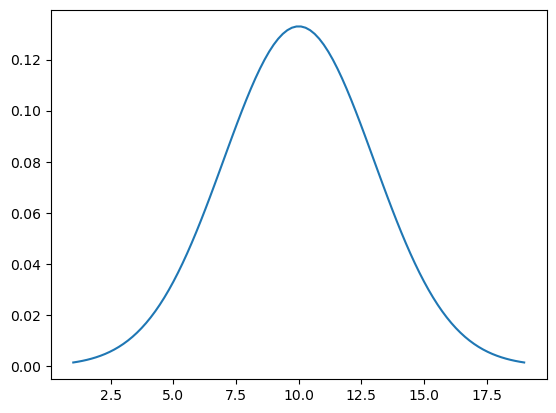

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

mu = 10
sigma = 3
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

Quelle: https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution

#### 2. (10%) Ziehen Sie aus dieser Verteilung n = [100, 1000, 10000] Stichproben, und plotten Sie diese Stichproben-Verteilungen als Histogramme in einer 3-teiligen Figure. Plotten Sie dann auf die Histogramme die PDF der Verteilung. 

#### 3. (2%) Was ist der Unterschied zwischen der Standardabweichung (STD) der Stichprobenverteilung und der STD der zugrundeliegenden Gaussverteilung? Stimmt das mit Ihren empirischen Ergebnissen überein?

#### 4. (10%) Laden Sie den numpy array `sample.npy`. Berechnen Sie das 95% Konfidenzintervall für den Mittelwert via Bootstrapping und vergleichen Sie ihn mit dem theoretischen Wert.

#### 5. (15%) Die Null Hypothese ist nun, dass der Mittelwert gleich 5 ist. Die Alternative Hypothese ist, dass er ungleich 5 ist. Würden Sie die Null Hypothese verwerfen? Nutzen Sie Bootstrapping.

## Aufgabe 3 (50%)

#### Wir wollen wissen, ob die Gruppen in diesem Tutorat gleich viel Zeit benötigen, um die Hausaufgaben zu lösen. Dazu wir haben wir von 2 der Gruppen die Zeiten über das Semester hinweg gemessen: 

gruppe1 = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]\
gruppe2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

Nutzen Sie in dieser Aufgabe ein Signifikanzniveau von 0.05. Sie können alle Hypothesentests mit Hilfe von Scipy durchführen. 

#### 1. (5%) Was ist H0 und H1? Sind die Gruppen unabhängig oder abhängig (paired vs. unpaired)

#### 2. (30%) Testen Sie die Daten auf folgende Annahmen. Nutzen Sie auch hierfür eigene geeignete Hypothesentests.

a) (15%) Die Datensätze beider Gruppen folgen einer Normalverteilung \
b) (15%) Die Datensätze beider Gruppen haben die gleiche STD (iid. data)

#### 3. (15%) Aufgrund der Ergebnise aus 1. und 2., welche Art von Hypothesentest brauchen Sie für diese Aufgabe? Führen Sie den Test durch.

---